<a href="https://colab.research.google.com/github/ngebodh/GX_tES_EEG_Physio_Behavior/blob/master/examples/GX_tES_Importing_From_SET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the GX dataset

This notebook shows how to import the GX dataset into Python.

<br>

**The code below shows how to download the `.set` files from [OpenNeuro](https://openneuro.org/datasets/ds003670/versions/1.1.0).**

<br>

Python also supports importing `.mat` files.

<br>

The GX dataset is provided as:
* Raw ANT neuro `.cnt` files (not Neuroscan `.cnt`), behavioral data provided separate
* Downsampled (1k Hz) `.mat` files with behavioral data included
* BIDS formatted data, including EEGlab compatible `.set` files, behavioral data provided separate


See the main [GX dataset page](https://zenodo.org/record/4456079) and [Github](https://github.com/ngebodh/GX_tES_EEG_Physio_Behavior).

<br>
If you use the GX dataset or resources from it please be sure to cite our work as:




>Gebodh, N., Esmaeilpour, Z., Datta, A. et al. Dataset of concurrent EEG, ECG, and behavior with multiple doses of transcranial electrical stimulation. Sci Data 8, 274 (2021). https://doi.org/10.1038/s41597-021-01046-y


<br>
<br>

**Contact**:
* Nigel Gebodh
* ngebodh01@citymail.cuny.edu






#Contents

>[Importing the GX dataset](#scrollTo=Qx873Wsqm31u)

>>[Getting Libraries We Need](#scrollTo=KpNcP_m2pasG)

>>[Downloading and Using The .set Files](#scrollTo=5vH8STi2reRM)

>>>[Looking at .set files info in .json](#scrollTo=16ufcGspu1Cf)

>>>[Loading the .set files data Into MNE](#scrollTo=QRDsXrWzqF59)

>>>[Plotting .set file data from MNE](#scrollTo=t1pC1KP6vPgV)

>>>[Plotting .set file data in other libraries](#scrollTo=op254DhXvcE6)



## Getting Libraries We Need

Here we make sure we have `MNE` installed.



In [ ]:
#Let's get MNE in our notebook
try:
  import mne
except:
  !pip install mne


We import all the libraries we need

In [ ]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import sys
import re
import json

## Downloading and Using The `.set` Files
Download the data files to our notebook from [OpenNeuro](https://openneuro.org/datasets/ds003670/versions/1.1.0)

When we download the data we make sure to get the:
* `.set` file
* `.fdt` file
* `.json` file

In [ ]:
#Download some data from OpenNeuro to inspect
#Data hosted here: https://openneuro.org/datasets/ds003670/versions/1.1.0

#Let's look at data from subject 1, session 3

!wget https://s3.amazonaws.com/openneuro.org/ds003670/sub-001/ses-03/eeg/sub-001_ses-03_task-GXtESCTT_eeg.fdt
!wget https://s3.amazonaws.com/openneuro.org/ds003670/sub-001/ses-03/eeg/sub-001_ses-03_task-GXtESCTT_eeg.set
!wget https://s3.amazonaws.com/openneuro.org/ds003670/sub-001/ses-03/eeg/sub-001_ses-03_task-GXtESCTT_eeg.json


--2023-10-03 00:37:36--  https://s3.amazonaws.com/openneuro.org/ds003670/sub-001/ses-03/eeg/sub-001_ses-03_task-GXtESCTT_eeg.fdt
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.134.253, 52.217.92.110, 54.231.165.48, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.134.253|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1194198600 (1.1G) [application/octet-stream]
Saving to: ‘sub-001_ses-03_task-GXtESCTT_eeg.fdt.1’

sub-001_ses-03_task 100%[===================>]   1.11G  47.6MB/s    in 25s     

2023-10-03 00:38:01 (46.1 MB/s) - ‘sub-001_ses-03_task-GXtESCTT_eeg.fdt.1’ saved [1194198600/1194198600]

--2023-10-03 00:38:01--  https://s3.amazonaws.com/openneuro.org/ds003670/sub-001/ses-03/eeg/sub-001_ses-03_task-GXtESCTT_eeg.set
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.226.208, 54.231.135.112, 52.217.41.230, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.226.208|:443... connected.
HTTP request sent, awaiting respons

### Looking at `.set` files info in `.json`

Let's look at the `.json` file to see what's in it.

This helps us to identify notes associated with the file we're going to import.


In [ ]:
# Opening JSON file
f = open('/content/sub-001_ses-03_task-GXtESCTT_eeg.json')

# returns JSON object as
# a dictionary
data = json.load(f)
print(json.dumps(data, indent = 4, sort_keys=True))


#Clean up formatting of file
aString =data["SubjectArtefactDescription"]
stringList = re.split(r';|\t', aString)
print(stringList)

montages_in = stringList[4].split(r':')[1].split(r',')
stim_amplitudes_in = stringList[5].split(r':')[1].split(r',')

for ii,_ in enumerate(montages_in):
  print(f"Stimulation montage {ii} was : {montages_in[ii]} at {stim_amplitudes_in[ii]} mA")


# Closing file
f.close()

{
    "ECGChannelCount": 1,
    "EEGChannelCount": 32,
    "EEGReference": "CPz",
    "EMGChannelCount": 0,
    "EOGChannelCount": 1,
    "InstitutionAddress": "Center for Discovery and Innovation, 85 St Nicholas Terrace, New York, NY 10031",
    "InstitutionName": "The City College of New York, CUNY",
    "InstitutionalDepartmentName": "Department of Biomedical Engineering",
    "ManufacturersModelName": "ANT Neuro-eego Wavegaurd Cap, eego Amplifier, 32 EEG chans + 3 external(ECG/EOG/RESP), Ref Input Range: 150-1000 mV pp",
    "MiscChannelCount": 35,
    "PowerLineFrequency": 60,
    "RecordingDuration": 4264.995,
    "RecordingType": "continuous",
    "SamplingFrequency": 2000,
    "SoftwareFilters": "n/a",
    "SubjectArtefactDescription": "File: 0103 ;Date, Start,Stop:10/11/19\t5:20:11 PM\t6:30:11 PM;Montages:P30, P0, P5;Stim Amplitude(mA): 0.5, 0.5, 0.5;Notes:",
    "TaskName": "GXtESCTT"
}
['File: 0103 ', 'Date, Start,Stop:10/11/19', '5:20:11 PM', '6:30:11 PM', 'Montages:P30, P0

### Loading the `.set` files data Into MNE

Now we pass the `.set` file to MNE and import it.

In [ ]:
fname = 'sub-001_ses-03_task-GXtESCTT_eeg.set'
raw = mne.io.read_raw_eeglab(fname)

raw

Reading /content/sub-001_ses-03_task-GXtESCTT_eeg.fdt


<ipython-input-5-ae8e7fc6b146>:2: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_eeglab(fname)


<RawEEGLAB | sub-001_ses-03_task-GXtESCTT_eeg.fdt, 35 x 8529990 (4265.0 s), ~53 kB, data not loaded>

### Plotting `.set` file data from `MNE`

Let's pull out a few seconds of data and plot all the channel using MNE's plotting function.

Using matplotlib as 2D backend.


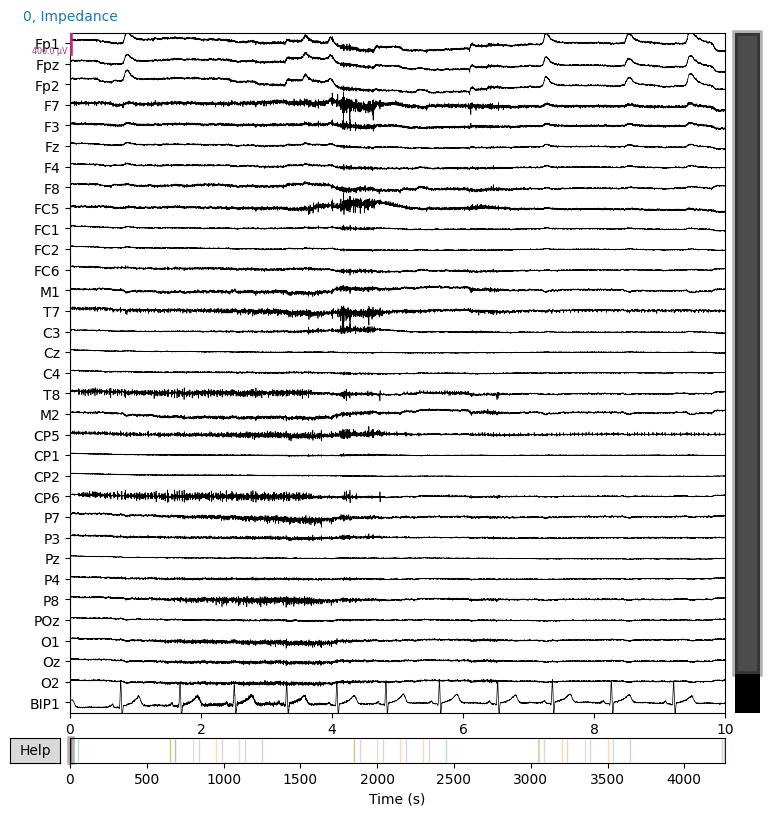

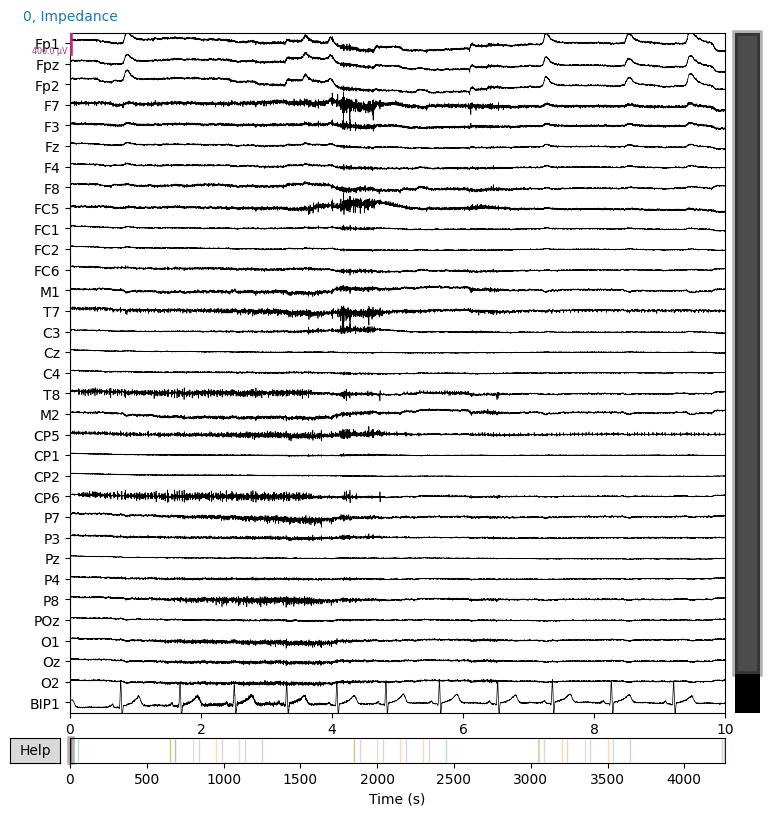

In [ ]:
#Plot the data using MNE's methods

#Set some of the scaling to see all channels
scaling_dict = dict(mag=1e-12, grad=4e-11, eeg=20e-5, eog=150e-6, ecg=5e-4,
                    emg=1e-3, ref_meg=1e-12, misc=1e-3, stim=1,
                    resp=1, chpi=1e-4, whitened=1e2)

raw.plot(n_channels=33, duration= 10, scalings=scaling_dict)#Plot all EEG channels and ECG (BIP1)

### Plotting `.set` file data in other libraries

Here we pull out some of the data imported by `MNE` and we plot them using Matplotlib and Plotly.

Let's pull out some more data to plot.

In [ ]:
#Code from here:

sampling_freq = raw.info["sfreq"]
start_stop_seconds = np.array([11, 20])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
channel_index = 0 #Channel FP1



raw_selection = raw[channel_index, start_sample:stop_sample]
# print(raw_selection)

Text(0.5, 1.0, 'Plotting EEG Channel FP1')

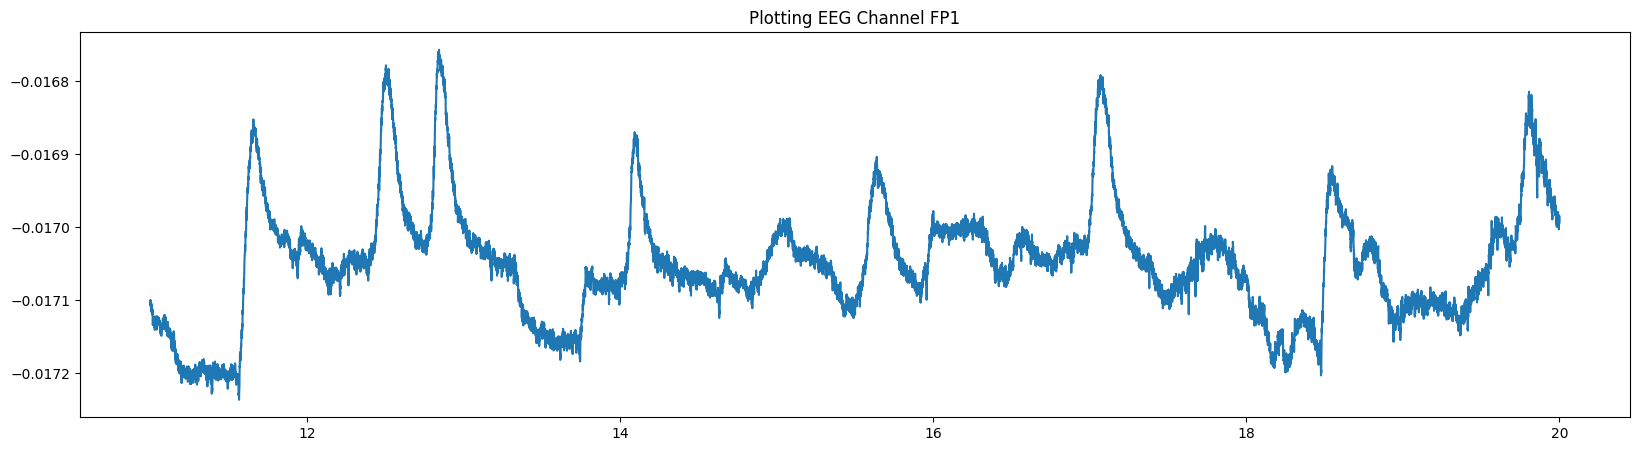

In [ ]:
x = raw_selection[1]
y = raw_selection[0].T
plt.figure(figsize=(20, 5))
plt.plot(x, y)
plt.title("Plotting EEG Channel FP1")


In [ ]:
#Let's use Plotly to look at the channel's data
import plotly.express as px
from plotly import graph_objs as go


px.line(x=x ,y=y[:,0].T, title="Plotting Channel FP1")


You can find more functionality from MNE on their [website](https://mne.tools/stable/auto_tutorials/index.html)